## Building Network Models
# UB Species-collectors Network
### SCN Communites

---

In [1]:
# Setting paths
import sys,os
import pathlib
sys.path.insert(0,os.path.expanduser('~/caryocar'))
sys.path.insert(0,os.path.abspath('..'))

In [2]:
# Building the networks from data
from setupmodels import *

In [3]:
# Importing libraries for analysis
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-paper')
sns.set_color_codes('deep')

%matplotlib inline

In [4]:
graphsdir = os.path.abspath('./graphs')

if not os.path.isdir(graphsdir):
    !mkdir graphs

### Taxonomic aggregation by genus

In [5]:
grp = dict(occs[['species','genus']].groupby('genus').apply(lambda x: set(x['species'])))

In [6]:
scn_genus = scn.taxonomicAggregation(grp)

In [7]:
print(nx.info(scn_genus))

Name: 
Type: SpeciesCollectorsNetwork
Number of nodes: 9937
Number of edges: 87632
Average degree:  17.6375


> Must fix: edges count attributes are being set to a numpy int. This is problematic for `nx.write_gexf`.

In [8]:
type(scn_genus['Abarema']['arbo,mm']['count'])

numpy.int64

In [9]:
# quickfix for the issue above
nx.set_edge_attributes(scn_genus, dict([ ((u,v),int(ct)) for u,v,ct in scn_genus.edges(data='count') ]), name='count')

In [10]:
#nx.write_gexf(scn_genus,os.path.join(graphsdir,'scn_agg_genus.gexf'))

---

### Taxonomic aggregation by family

In [11]:
grp = dict(occs[['species','family']].groupby('family').apply(lambda x: set(x['species'])))

In [12]:
scn_family = scn.taxonomicAggregation(grp)

In [13]:
nx.set_edge_attributes(scn_family, dict([ ((u,v),int(ct)) for u,v,ct in scn_family.edges(data='count') ]), name='count')

In [14]:
nx.write_gexf(scn_family,os.path.join(graphsdir,'scn_agg_family.gexf'))

In [15]:
!ls graphs

scn_agg_family.gexf		      scn_family_projSp_communities.gephi
scn_agg_family_proj_col.gexf	      scn_family_projSp_communities.gexf
scn_family_projCol_communities.gephi  scn_family_projSp_communities.pdf
scn_family_projCol_communities.gexf   scn_family_projSp_communities.svg
scn_family_projCol_communities.pdf    scn_species_projCol_communities.gexf
scn_family_projCol_communities.svg


---

### Figure: Aggregation and density

Plot a figure comparing network aggregation and density

In [16]:
group = lambda x: dict(occs[['species',x]].groupby(x).apply(lambda x: set(x['species']))) 

scn_genus = scn.taxonomicAggregation(group('genus'))
scn_family = scn.taxonomicAggregation(group('family'))
scn_order = scn.taxonomicAggregation(group('order'))
scn_class = scn.taxonomicAggregation(group('class'))
scn_phylum = scn.taxonomicAggregation(group('phylum'))
scn_kingdom = scn.taxonomicAggregation(group('kingdom'))

In [17]:
density = lambda g: g.number_of_edges() / (len(g.listCollectorsNodes())*len(g.listSpeciesNodes()))

graphs = [ scn, scn_genus, scn_family, scn_order, scn_class, scn_phylum, scn_kingdom ]
n_spp, n_edges, density = zip(*[ ( len(g.listSpeciesNodes()), g.number_of_edges(), density(g) ) for g in graphs ])

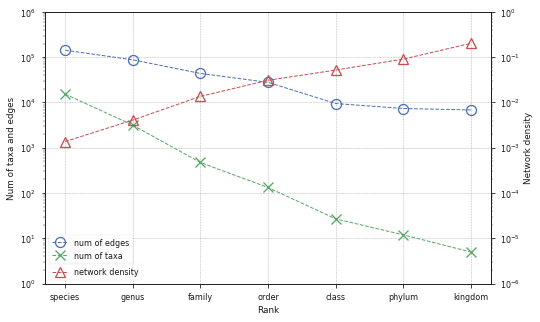

In [18]:
plt.figure(figsize=(8,5))
ax = plt.axes()
ax_r = plt.twinx(ax)

mew = 1.3
mfc = 'none'
ms=10
lw=1

classes = ['species','genus','family','order','class','phylum','kingdom']

ax.plot([ i for i,d in enumerate(classes) ],n_edges,'o', color='b',
                                                    ls='--',
                                                    markeredgewidth=mew, 
                                                    markerfacecolor=mfc,
                                                    ms=ms,
                                                    lw=lw)

ax.plot([ i for i,d in enumerate(classes) ],n_spp,'x', color='g',
                                                    ls='--',
                                                    markeredgewidth=mew, 
                                                    markerfacecolor=mfc,
                                                    ms=ms,
                                                    lw=lw)

ax_r.plot([ i for i,d in enumerate(classes) ],density,'^',color='r',
                                                    ls='--',
                                                    markeredgewidth=mew, 
                                                    markerfacecolor=mfc,
                                                    ms=ms,
                                                    lw=lw)


ax.set_yscale('log')
ax.set_ylim(1,1e6)
ax.set_xlabel('Rank')
ax.set_ylabel('Num of taxa and edges')
ax.set_xticklabels(['']+classes)

ax_r.set_yscale('log')
ax_r.set_ylim(1e-6,1)

ax_r.set_ylabel('Network density')

ax_r.legend(['network density'],loc=3)
ax.legend(['num of edges','num of taxa'],loc=3,bbox_to_anchor=(0,0.06))

ax.grid(linewidth=0.5, ls='--',color='.7')
#plt.savefig('/home/pedro/Downloads/scn_tax_agg_curves.pdf',dpi=192,format='pdf',bbox_inches='tight')

---

In [19]:
print("Num of spp nodes in the scn: {}\n\
Num of spp nodes in the scn_family: {}\n\
Num of edges in the scn: {}\n\
Num of edges in the scn_family: {}".format( 
    len(scn.listSpeciesNodes()), len(scn_family.listSpeciesNodes()),
    scn.number_of_edges(), scn_family.number_of_edges()
    )
)

Num of spp nodes in the scn: 15344
Num of spp nodes in the scn_family: 474
Num of edges in the scn: 142647
Num of edges in the scn_family: 43803


In [20]:
density = lambda g: g.number_of_edges() / (len(g.listCollectorsNodes())*len(g.listSpeciesNodes()))
density(scn_family)

0.013654165544483347

In [21]:
sorted( scn_family.listSpeciesNodes(data='count'), key=lambda x: x[1], reverse=True)

[('Fabaceae', 16005),
 ('Myrtaceae', 10951),
 ('Asteraceae', 10145),
 ('Rubiaceae', 8677),
 ('Poaceae', 5761),
 ('Cyperaceae', 5726),
 ('Melastomataceae', 5416),
 ('Malpighiaceae', 4148),
 ('Euphorbiaceae', 3448),
 ('Bignoniaceae', 3442),
 ('Desmidiaceae', 3392),
 ('Sematophyllaceae', 2360),
 ('Apocynaceae', 2121),
 ('Vochysiaceae', 2068),
 ('Malvaceae', 2060),
 ('Lamiaceae', 2051),
 ('Piperaceae', 1595),
 ('Orchidaceae', 1502),
 ('Convolvulaceae', 1371),
 ('Eunotiaceae', 1348),
 ('Solanaceae', 1345),
 ('Lythraceae', 1331),
 ('Polygalaceae', 1321),
 ('Hypnaceae', 1276),
 ('Dicranaceae', 1229),
 ('Annonaceae', 1185),
 ('Oxalidaceae', 1170),
 ('Verbenaceae', 1128),
 ('Acanthaceae', 1052),
 ('Sapindaceae', 974),
 ('Erythroxylaceae', 934),
 ('Loranthaceae', 880),
 ('Santalaceae', 876),
 ('Ochnaceae', 844),
 ('Chrysobalanaceae', 828),
 ('Eriocaulaceae', 828),
 ('Calophyllaceae', 811),
 ('Anacardiaceae', 786),
 ('Iridaceae', 721),
 ('Celastraceae', 703),
 ('Lauraceae', 700),
 ('Gentianaceae'

In [22]:
sorted( scn_family.edges('irwin,hs', data='count'), key=lambda x: x[2],reverse=True )

[('irwin,hs', 'Fabaceae', 3217),
 ('irwin,hs', 'Rubiaceae', 1211),
 ('irwin,hs', 'Asteraceae', 1178),
 ('irwin,hs', 'Poaceae', 835),
 ('irwin,hs', 'Cyperaceae', 753),
 ('irwin,hs', 'Euphorbiaceae', 729),
 ('irwin,hs', 'Melastomataceae', 642),
 ('irwin,hs', 'Malpighiaceae', 600),
 ('irwin,hs', 'Myrtaceae', 399),
 ('irwin,hs', 'Polygalaceae', 385),
 ('irwin,hs', 'Lamiaceae', 363),
 ('irwin,hs', 'Apocynaceae', 337),
 ('irwin,hs', 'Malvaceae', 335),
 ('irwin,hs', 'Bignoniaceae', 301),
 ('irwin,hs', 'Orchidaceae', 301),
 ('irwin,hs', 'Convolvulaceae', 274),
 ('irwin,hs', 'Vochysiaceae', 226),
 ('irwin,hs', 'Solanaceae', 205),
 ('irwin,hs', 'Piperaceae', 192),
 ('irwin,hs', 'Iridaceae', 183),
 ('irwin,hs', 'Anemiaceae', 173),
 ('irwin,hs', 'Gentianaceae', 165),
 ('irwin,hs', 'Verbenaceae', 159),
 ('irwin,hs', 'Apiaceae', 146),
 ('irwin,hs', 'Calophyllaceae', 134),
 ('irwin,hs', 'Lythraceae', 134),
 ('irwin,hs', 'Acanthaceae', 131),
 ('irwin,hs', 'Turneraceae', 125),
 ('irwin,hs', 'Annonaceae

In [23]:
scn_family['faria,jeq']['Myrtaceae']['count']/sum(ct for u,v,ct in scn_family.edges('faria,jeq',data='count') )

0.3096100575324952

In [24]:
scn_family['faria,jeq']['Myrtaceae']

{'count': 1453}

In [25]:
dict(scn_family.listCollectorsNodes(data='count'))['faria,jeq']

4693

In [29]:
occs.loc[ni['grando,jv']]

,rightsHolder,recordedBy,occurrenceRemarks,eventDate,countryCode,stateProvince,scientificName,kingdom,phylum,class,order,family,genus,taxonRank,species,repatriated,recordedBy_atomized
52550,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Scenedesmus acuminatus f. acuminatus,Plantae,Chlorophyta,Chlorophyceae,Sphaeropleales,Scenedesmaceae,Acutodesmus,FORM,Acutodesmus acuminatus,False,"[Castelo-Branco, CW, Grando, JV]"
52556,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,"Dictyosphaerium ehrenbergianum Nägeli, 1849",Plantae,Chlorophyta,Trebouxiophyceae,Chlorellales,Chlorellaceae,Dictyosphaerium,SPECIES,Dictyosphaerium ehrenbergianum,False,"[Castelo-Branco, CW, Grando, JV]"
52557,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Pediastrum duplex var. duplex,Plantae,Chlorophyta,Chlorophyceae,Sphaeropleales,Hydrodictyaceae,Pediastrum,VARIETY,Pediastrum duplex,False,"[Castelo-Branco, CW, Grando, JV]"
52560,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Monoraphidium setiforme (Nygaard) Komárková-Le...,Plantae,Chlorophyta,Chlorophyceae,Sphaeropleales,Selenastraceae,Monoraphidium,SPECIES,Monoraphidium komarkovae,False,"[Castelo-Branco, CW, Grando, JV]"
52568,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Coelastrum microporum var. microporum,Plantae,Chlorophyta,Chlorophyceae,Sphaeropleales,Scenedesmaceae,Coelastrum,VARIETY,Coelastrum microporum,False,"[Castelo-Branco, CW, Grando, JV]"
52569,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Trachelomonas armata var. armata,Protozoa,Euglenozoa,Euglenoidea,Euglenida,Euglenaceae,Trachelomonas,VARIETY,Trachelomonas armata,False,"[Castelo-Branco, CW, Grando, JV]"
52571,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Chlorella vulgaris var. vulgaris,Plantae,Chlorophyta,Trebouxiophyceae,Chlorellales,Chlorellaceae,Chlorella,VARIETY,Chlorella vulgaris,False,"[Castelo-Branco, CW, Grando, JV]"
52572,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Cylindrospermopsis raciborskii (Wolosz.) Seena...,Bacteria,Cyanobacteria,Cyanophyceae,Nostocales,Nostocaceae,Anabaenopsis,SPECIES,Anabaenopsis raciborskii,False,"[Castelo-Branco, CW, Grando, JV]"
52575,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Scenedesmus protuberans var. protuberans,Plantae,Chlorophyta,Chlorophyceae,Sphaeropleales,Scenedesmaceae,Desmodesmus,VARIETY,Desmodesmus protuberans,False,"[Castelo-Branco, CW, Grando, JV]"
52576,UB - Herbário da Universidade de Brasília,"Castelo-Branco, CW; Grando, JV",NaN,1988-03-26T01:00Z,BR,Distrito Federal,Cylindrospermopsis raciborskii (Wolosz.) Seena...,Bacteria,Cyanobacteria,Cyanophyceae,Nostocales,Nostocaceae,Anabaenopsis,SPECIES,Anabaenopsis raciborskii,False,"[Castelo-Branco, CW, Grando, JV]"


In [31]:
occs.loc[ni['leite,alta']]['family'].value_counts()

Desmidiaceae     2688
Closteriaceae      69
Name: family, dtype: int64

In [34]:
occs[occs['family']=='Closteriaceae']['recordedBy'].value_counts()

Leite, ALTA    69
Name: recordedBy, dtype: int64

In [36]:
[ n for n in scn.listCollectorsNodes() if 'rocha' in n]

['rocha,mp',
 'rocha',
 'rocha,sca',
 'rocha,m',
 'rocha,dms',
 'rochafilho,cc',
 'brochado,al',
 'brochado,ts',
 'rocha,gi',
 'rocha,eec',
 'rocha,fec',
 'rocha,cca',
 'rocha,co',
 'rocha,ea',
 'rocha,cc',
 'rocha,da',
 'rocha,p',
 'rocha,mal',
 'rocha,c',
 'rocha,cr',
 'rocha,rn',
 'rocha,yv',
 'rocha,acs',
 'rocha,ff',
 'rocha,f',
 'rocha,a',
 'rocha,e',
 'rocha,ds',
 'rocha,wd',
 'rocha,r',
 'rocha,gpe',
 'rocha,ft',
 'rochafilho,c',
 'rocha,t',
 'rocha,mjr',
 'rocha,ra',
 'rocha,kd',
 'rocha,dm']

In [ ]:
pd.DataFrame.drop_duplicates()

In [48]:
occs.loc[ni['castelobranco,cw']][['family','phylum']].drop_duplicates()

,family,phylum
52550,Scenedesmaceae,Chlorophyta
52556,Chlorellaceae,Chlorophyta
52557,Hydrodictyaceae,Chlorophyta
52560,Selenastraceae,Chlorophyta
52569,Euglenaceae,Euglenozoa
52572,Nostocaceae,Cyanobacteria
52577,Sphaerocystidaceae,Chlorophyta
52578,Chroococcaceae,Cyanobacteria
52586,Desmidiaceae,Charophyta
52588,Pseudanabaenaceae,Cyanobacteria
